# 제 4장 회귀

## 4.1 데이터 가져오기

In [91]:
import numpy as np


In [92]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [93]:
print("길이:",perch_length.shape, "무게:", perch_weight.shape )

길이: (56,) 무게: (56,)


In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

X_train

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [95]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

## 다항회귀 데이터 준비

In [96]:
train_ploy=np.column_stack((X_train**2,X_train))
test_poly=np.column_stack((X_test**2,X_test))


In [97]:
train_ploy[:3]

array([[384.16,  19.6 ],
       [484.  ,  22.  ],
       [349.69,  18.7 ]])

In [98]:
print(train_ploy.shape,test_poly.shape)

(42, 2) (14, 2)


## 선형 회귀 

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



In [100]:
lr=LinearRegression()

In [101]:
lr.fit(train_ploy,y_train)

LinearRegression()

In [102]:
lr2=LinearRegression()

In [103]:
lr2.fit(X_train,y_train)

LinearRegression()

In [104]:
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [105]:
lr2.predict([[50]])

array([1241.83860323])

In [106]:
print("계수:",lr.coef_,"절편:",lr.intercept_)

계수: [  1.01433211 -21.55792498] 절편: 116.0502107827827


In [107]:
lenx=50
weight= 1.01433211 *lenx*lenx-21.55792498*lenx +116.0502107827827
print(weight)

1573.9842367827825


In [108]:
import matplotlib.pyplot as plt


point=np.arange(15,50)
point



array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49])

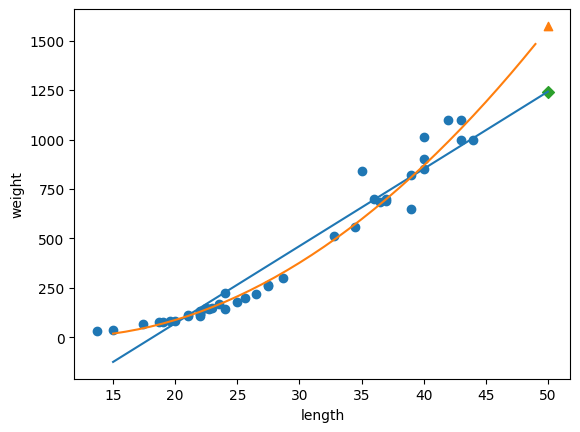

In [109]:
plt.scatter(X_train,y_train)
plt.plot([15,50],[15*lr2.coef_+lr2.intercept_,50*lr2.coef_+lr2.intercept_])
plt.plot(point, 1.01*point**2-21.6*point+116.05)
plt.scatter(50,1574,marker="^")
plt.scatter(50,1242,marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [110]:
lr2.score(X_train,y_train)


0.9398463339976041

In [111]:
lr2.score(X_test,y_test)

0.824750312331356

In [112]:
print(lr.score(train_ploy,y_train))


0.9706807451768623


In [113]:
print(lr.score(test_poly,y_test))

0.9775935108325122


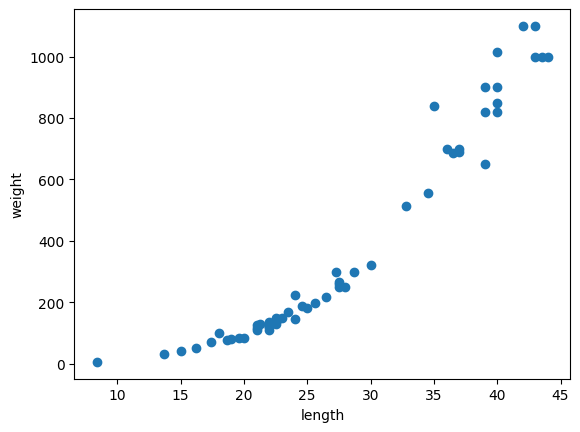

0.9804899950518966
0.9746459963987609


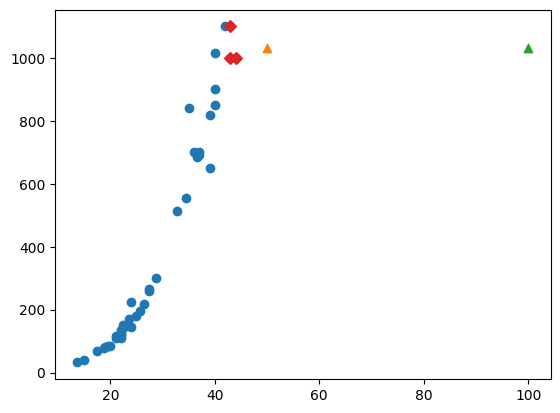

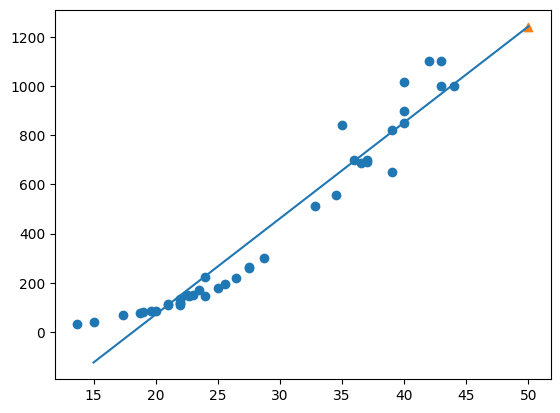

0.9706807451768623
0.9775935108325122
[1573.98423528]


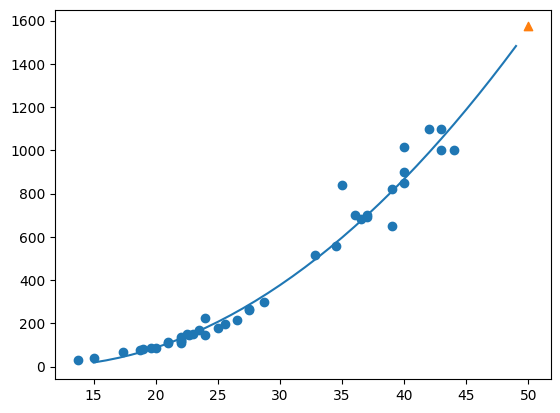

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


# 산포도(scatter plot) 그리기
import matplotlib.pyplot as plt 

plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 훈련 데이터와 테스트 데이터로 나눠주기 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

## 훈련 데이터와 테스트 데이터의 길이는 2차원 배열로 만들어줘야함 =>사이킷런에 사용할 훈련세트는 2차원 배열이여야 함
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)



from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
print(knr.score(X_train,y_train)) ## R**2= 1-(타깃-예측)**2의 합 /(타깃-평균)**2의 합
print(knr.score(X_test,y_test))

## KNN의 한계 => knr은 가장 가까운 샘플들을 찾아 타깃의 평균을 구하는데, 새로운 샘플이 훈련테스트의 범위에 벗어나면 엉뚱한 값을 예측할 수 있다.
knr.predict([[50]])

distances,indexes=knr.kneighbors([[50]])

import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.scatter(50,1033,marker="^")
plt.scatter(100,1033,marker="^")
plt.scatter(X_train[indexes],y_train[indexes],marker="D")
plt.show()

##-------------------------------------------------------------------------------------------------------------------------------------------
## 선형 회귀
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

lr.predict([[50]])


plt.scatter(X_train,y_train)
plt.scatter(50,1241,marker="^")
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.show()

##------------------------------------------------------------------------------------------------------------------------------------------------
## 다항 회귀
train_poly=np.column_stack((X_train**2,X_train))
test_poly=np.column_stack((X_test**2,X_test))

lr2=LinearRegression()
lr2.fit(train_poly,y_train)
print(lr2.score(train_poly,y_train))
print(lr2.score(test_poly,y_test))

print(lr2.predict([[50**2,50]]))

point=np.arange(15,50)

plt.scatter(X_train,y_train)
plt.scatter(50,1573,marker="^")
plt.plot(point,1.01*point**2-21.6*point+116.05)
plt.show()


